In [145]:
import cv2
import numpy as np
import matplotlib.pylab as plt

In [146]:
frame_test = cv2.imread('road.png')
frame_test_2 = cv2.cvtColor(frame_test, cv2.COLOR_BGR2RGB) #Converting brg to rgb for matplotlib

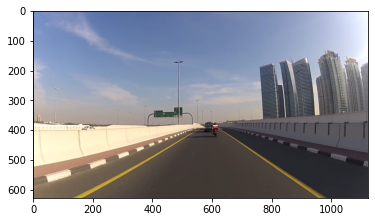

In [147]:
plt.imshow(frame_test_2)

In [148]:
height = frame_test.shape[0]
width = frame_test.shape[1] 

region_of_interest_vertices = [(0, height), (0,500), (700,400), (width,500), (width, height)]

# Region of interest
### We define a region where the detections have to be made to avoid false detections in the image.

In [149]:
def region_of_interest(img, vertices):
    mask = np.zeros_like(img)
    channel_count = img.shape[2]
    match_mask_color = (255,)*channel_count
    cv2.fillPoly(mask, vertices, match_mask_color)
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image

In [150]:
cropped_image = region_of_interest(frame_test,
                np.array([region_of_interest_vertices], np.int32),)

# Cropped image

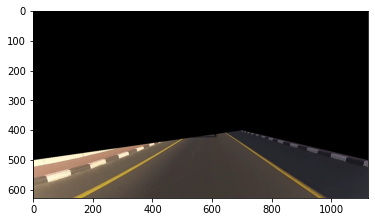

In [151]:
cropped_image_2 = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB) #Converting brg to rgb for matplotlib
plt.imshow(cropped_image_2) 

# Preprocessing image 

In [152]:
blur = cv2.GaussianBlur(cropped_image, (5, 5), 0)    
hsv = cv2.cvtColor(blur, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(hsv, (20, 100, 100), (30, 255, 255))
edges = cv2.Canny(mask, 75, 150)

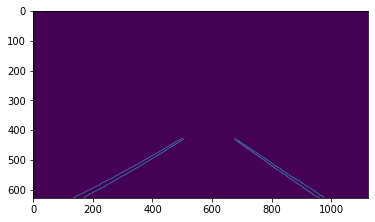

In [153]:
plt.imshow(edges)

# Detecting lanes

In [154]:
lines = cv2.HoughLinesP(edges,1,np.pi/180,75,minLineLength=130,maxLineGap=50)

In [155]:
lines

array([[[676, 431, 947, 620]],

       [[675, 425, 918, 589]],

       [[197, 611, 431, 476]],

       [[149, 619, 379, 497]],

       [[677, 432, 940, 616]],

       [[314, 533, 497, 428]],

       [[168, 610, 358, 509]],

       [[222, 598, 379, 507]],

       [[353, 523, 503, 429]]], dtype=int32)

# Drawing the lines on the image

In [158]:
for line in lines:
    x1,y1,x2,y2 = line[0]
    cv2.line(frame_test_2,(x1,y1),(x2,y2),(0,255,0),6)

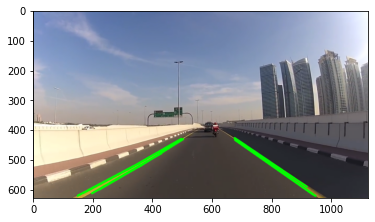

In [159]:
plt.imshow(frame_test_2)

# Video
### Now we will be implementing this method on a video so that it can be used in real-time.

In [160]:
video = cv2.VideoCapture("road_car_view.mp4")
ret, frame = video.read()
height = frame.shape[0]
width = frame.shape[1] 
region_of_interest_vertices = [(0, height), (0,500), (700,400), (width,500), (width, height)]

In [161]:
video = cv2.VideoCapture("road_car_view.mp4")

In [162]:
def region_of_interest_2(img, vertices):
    mask = np.zeros_like(img)
    #channel_count = img.shape[2]
    match_mask_color = 255
    cv2.fillPoly(mask, vertices, match_mask_color)
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image

In [163]:
while True:
    ret, frame = video.read()
    if not ret:
        video = cv2.VideoCapture("road_car_view.mp4")
        continue
    
    blur = cv2.GaussianBlur(frame, (5, 5), 0)    
    hsv = cv2.cvtColor(blur, cv2.COLOR_BGR2HSV)
    mask = cv2.inRange(hsv, (20, 100, 100), (30, 255, 255))
    edges = cv2.Canny(mask, 75, 150)
    cropped_image = region_of_interest_2(edges,
                np.array([region_of_interest_vertices], np.int32),)
    
    lines = cv2.HoughLinesP(cropped_image,1,np.pi/180,75,minLineLength=130,maxLineGap=50)
    
    if lines is not None:
        for line in lines:
            x1,y1,x2,y2 = line[0]
            cv2.line(frame,(x1,y1),(x2,y2),(0,255,0),6)
    
    cv2.imshow("vid", frame)
    if cv2.waitKey(25) == ord('q'):
        break
video.release()
cv2.destroyAllWindows()